In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
fair           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,fair,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,fair
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
fair             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.drop(labels = ['Cabin', 'Ticket'], axis = 1, inplace = True)

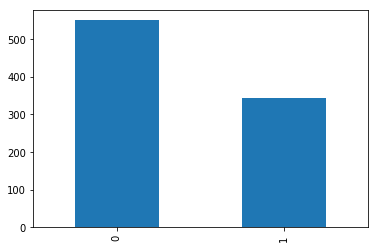

In [8]:
data['Survived'].value_counts().plot(kind = 'bar', stacked = True)

In [9]:
print(len(data['Survived']))

891


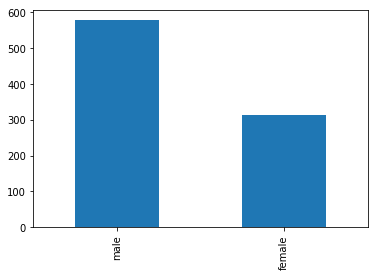

In [10]:
data['Sex'].value_counts().plot(kind = 'bar', stacked = True)

In [11]:
sex1 = sorted(data['Sex'].unique())
for i in sex1:
    print ('sex', {i}, ': ', len(data['Sex'] == i))

sex {'female'} :  891
sex {'male'} :  891


In [12]:
age = data.copy()
age.dropna(inplace = True)

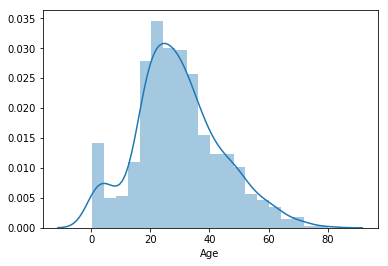

In [13]:
sns.distplot(age["Age"])

The distribution of ages is slightly right skewed. So we need to fill null values with the median for best accuracy.

In [14]:
data['Age'].fillna(data['Age'].median(), inplace = True)

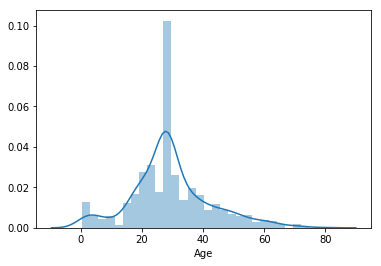

In [15]:
sns.distplot(data["Age"])

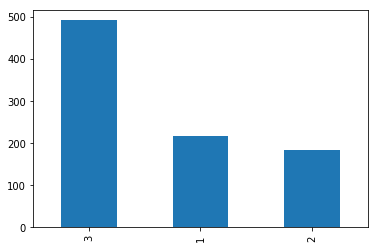

In [16]:
data['Pclass'].value_counts().plot(kind = 'bar', stacked = True)

In [17]:
pclss = sorted(data['Pclass'].unique())
for i in pclss:
    print ('Total', {i}, ': ', len(data[(data['Pclass'] == i)]))

Total {1} :  216
Total {2} :  184
Total {3} :  491


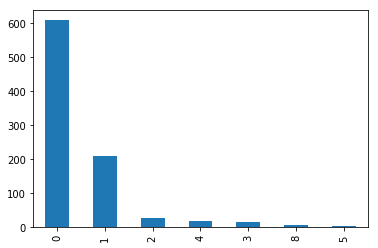

In [18]:
data['SibSp'].value_counts().plot(kind = 'bar', stacked = True)

In [19]:
sib = sorted(data['SibSp'].unique())
for i in sib:
    print ('Total', {i}, ': ', len(data[(data['SibSp'] == i)]))

Total {0} :  608
Total {1} :  209
Total {2} :  28
Total {3} :  16
Total {4} :  18
Total {5} :  5
Total {8} :  7


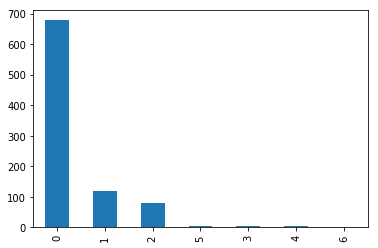

In [20]:
data['Parch'].value_counts().plot(kind = 'bar', stacked = True)

In [21]:
parch = sorted(data['Parch'].unique())
for i in parch:
    print ('Total', {i}, ': ', len(data[(data['Parch'] == i)]))

Total {0} :  678
Total {1} :  118
Total {2} :  80
Total {3} :  5
Total {4} :  4
Total {5} :  5
Total {6} :  1


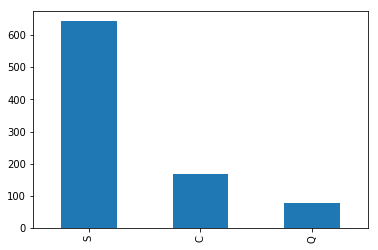

In [22]:
data['Embarked'].value_counts().plot(kind = 'bar', stacked = True)

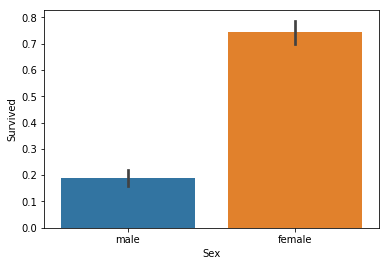

In [23]:
sns.barplot(x = 'Sex', y = 'Survived', data = data)

In [24]:
sex1 = sorted(data['Sex'].unique())
for i in sex1:
    print ('sex', {i}, 'dead : ', len(data[(data['Sex'] == i)  & (data['Survived'] == 0)]))
    print ('sex', {i}, 'survived : ', len(data[(data['Sex'] == i)  & (data['Survived'] == 1)]))

sex {'female'} dead :  81
sex {'female'} survived :  233
sex {'male'} dead :  468
sex {'male'} survived :  109


In [25]:
print ('Male dead : ', len(data[(data['Sex'] == 'male')  & (data['Survived'] == 0)]))
print ('Female dead : ', len(data[(data['Sex'] =='female') & (data['Survived'] == 0)]))
print ('Male survived : ', len(data[(data['Sex'] == 'male')  & (data['Survived'] == 1)]))
print ('Female survived: ', len(data[(data['Sex'] =='female') & (data['Survived'] == 1)]))

Male dead :  468
Female dead :  81
Male survived :  109
Female survived:  233


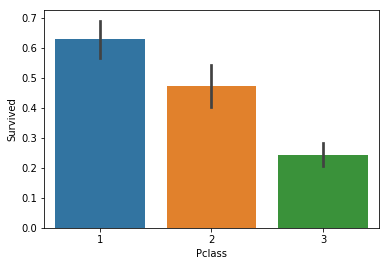

In [26]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data)

In [27]:
for i in pclss:
    print ('Total dead', {i}, ': ', len(data[(data['Pclass'] == i) & (data['Survived'] == 0)]))
    print ('Total survived', {i}, ': ', len(data[(data['Pclass'] == i) & (data['Survived'] == 1)]))

Total dead {1} :  80
Total survived {1} :  136
Total dead {2} :  97
Total survived {2} :  87
Total dead {3} :  372
Total survived {3} :  119


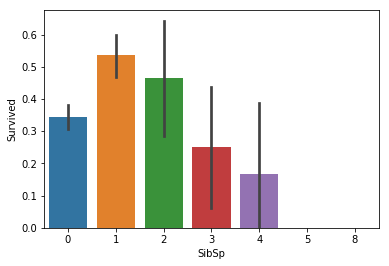

In [28]:
sns.barplot(x = 'SibSp', y = 'Survived', data = data)

In [29]:
for i in sib:
    print ('Total dead', {i}, ': ', len(data[(data['SibSp'] == i) & (data['Survived'] == 0)]))
    print ('Total survived', {i}, ': ', len(data[(data['SibSp'] == i) & (data['Survived'] == 1)]))

Total dead {0} :  398
Total survived {0} :  210
Total dead {1} :  97
Total survived {1} :  112
Total dead {2} :  15
Total survived {2} :  13
Total dead {3} :  12
Total survived {3} :  4
Total dead {4} :  15
Total survived {4} :  3
Total dead {5} :  5
Total survived {5} :  0
Total dead {8} :  7
Total survived {8} :  0


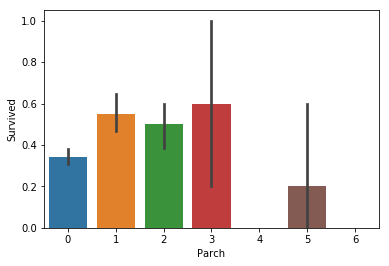

In [30]:
sns.barplot(x = 'Parch', y = 'Survived', data = data)

In [31]:
for i in parch:
    print ('Total dead', {i}, ': ', len(data[(data['Parch'] == i) & (data['Survived'] == 0)]))
    print ('Total survived', {i}, ': ', len(data[(data['Parch'] == i) & (data['Survived'] == 1)]))

Total dead {0} :  445
Total survived {0} :  233
Total dead {1} :  53
Total survived {1} :  65
Total dead {2} :  40
Total survived {2} :  40
Total dead {3} :  2
Total survived {3} :  3
Total dead {4} :  4
Total survived {4} :  0
Total dead {5} :  4
Total survived {5} :  1
Total dead {6} :  1
Total survived {6} :  0


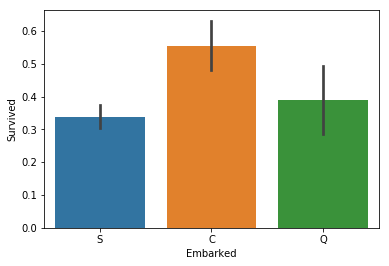

In [32]:
sns.barplot(x = 'Embarked', y = 'Survived', data = data)

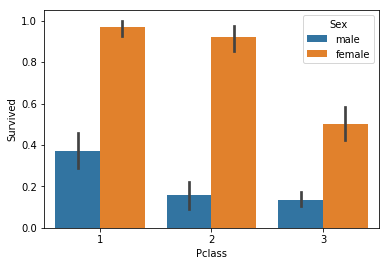

In [33]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data)

In [34]:
for i in pclss:
    print ('Total  male dead', {i}, ': ', len(data[(data['Pclass'] == i) & (data['Survived'] == 0) & (data['Sex'] == 'male')]))
    print ('Total female dead', {i}, ': ', len(data[(data['Pclass'] == i) & (data['Survived'] == 0) & (data['Sex'] == 'female')]))
    
for i in pclss:
    print ('Total  male survived', {i}, ': ', len(data[(data['Pclass'] == i) & (data['Survived'] == 1) & (data['Sex'] == 'male')]))
    print ('Total female survived', {i}, ': ', len(data[(data['Pclass'] == i) & (data['Survived'] == 1) & (data['Sex'] == 'female')]))

Total  male dead {1} :  77
Total female dead {1} :  3
Total  male dead {2} :  91
Total female dead {2} :  6
Total  male dead {3} :  300
Total female dead {3} :  72
Total  male survived {1} :  45
Total female survived {1} :  91
Total  male survived {2} :  17
Total female survived {2} :  70
Total  male survived {3} :  47
Total female survived {3} :  72


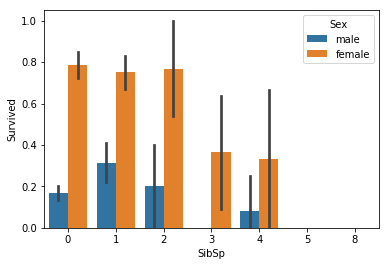

In [35]:
sns.barplot(x = 'SibSp', y = 'Survived', hue = 'Sex', data = data)

In [36]:
for i in sib:
    print ('Total  male dead', {i}, ': ', len(data[(data['SibSp'] == i) & (data['Survived'] == 0) & (data['Sex'] == 'male')]))
    print ('Total female dead', {i}, ': ', len(data[(data['SibSp'] == i) & (data['Survived'] == 0) & (data['Sex'] == 'female')]))
    
for i in sib:
    print ('Total  male survived', {i}, ': ', len(data[(data['SibSp'] == i) & (data['Survived'] == 1) & (data['Sex'] == 'male')]))
    print ('Total female survived', {i}, ': ', len(data[(data['SibSp'] == i) & (data['Survived'] == 1) & (data['Sex'] == 'female')]))

Total  male dead {0} :  361
Total female dead {0} :  37
Total  male dead {1} :  71
Total female dead {1} :  26
Total  male dead {2} :  12
Total female dead {2} :  3
Total  male dead {3} :  5
Total female dead {3} :  7
Total  male dead {4} :  11
Total female dead {4} :  4
Total  male dead {5} :  4
Total female dead {5} :  1
Total  male dead {8} :  4
Total female dead {8} :  3
Total  male survived {0} :  73
Total female survived {0} :  137
Total  male survived {1} :  32
Total female survived {1} :  80
Total  male survived {2} :  3
Total female survived {2} :  10
Total  male survived {3} :  0
Total female survived {3} :  4
Total  male survived {4} :  1
Total female survived {4} :  2
Total  male survived {5} :  0
Total female survived {5} :  0
Total  male survived {8} :  0
Total female survived {8} :  0


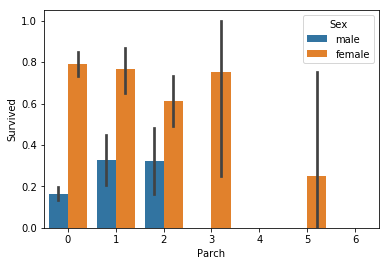

In [37]:
sns.barplot(x = 'Parch', y = 'Survived', hue = 'Sex', data = data)

In [38]:
for i in parch:
    print ('Total  male dead', {i}, ': ', len(data[(data['Parch'] == i) & (data['Survived'] == 0) & (data['Sex'] == 'male')]))
    print ('Total female dead', {i}, ': ', len(data[(data['Parch'] == i) & (data['Survived'] == 0) & (data['Sex'] == 'female')]))
    
for i in parch:
    print ('Total  male survived', {i}, ': ', len(data[(data['Parch'] == i) & (data['Survived'] == 1) & (data['Sex'] == 'male')]))
    print ('Total female survived', {i}, ': ', len(data[(data['Parch'] == i) & (data['Survived'] == 1) & (data['Sex'] == 'female')]))

Total  male dead {0} :  404
Total female dead {0} :  41
Total  male dead {1} :  39
Total female dead {1} :  14
Total  male dead {2} :  21
Total female dead {2} :  19
Total  male dead {3} :  1
Total female dead {3} :  1
Total  male dead {4} :  2
Total female dead {4} :  2
Total  male dead {5} :  1
Total female dead {5} :  3
Total  male dead {6} :  0
Total female dead {6} :  1
Total  male survived {0} :  80
Total female survived {0} :  153
Total  male survived {1} :  19
Total female survived {1} :  46
Total  male survived {2} :  10
Total female survived {2} :  30
Total  male survived {3} :  0
Total female survived {3} :  3
Total  male survived {4} :  0
Total female survived {4} :  0
Total  male survived {5} :  0
Total female survived {5} :  1
Total  male survived {6} :  0
Total female survived {6} :  0


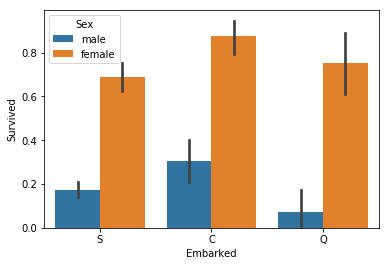

In [39]:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = data)

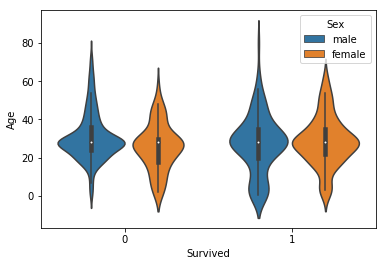

In [40]:
sns.violinplot(x = 'Survived', y = 'Age', hue = 'Sex', data = data)

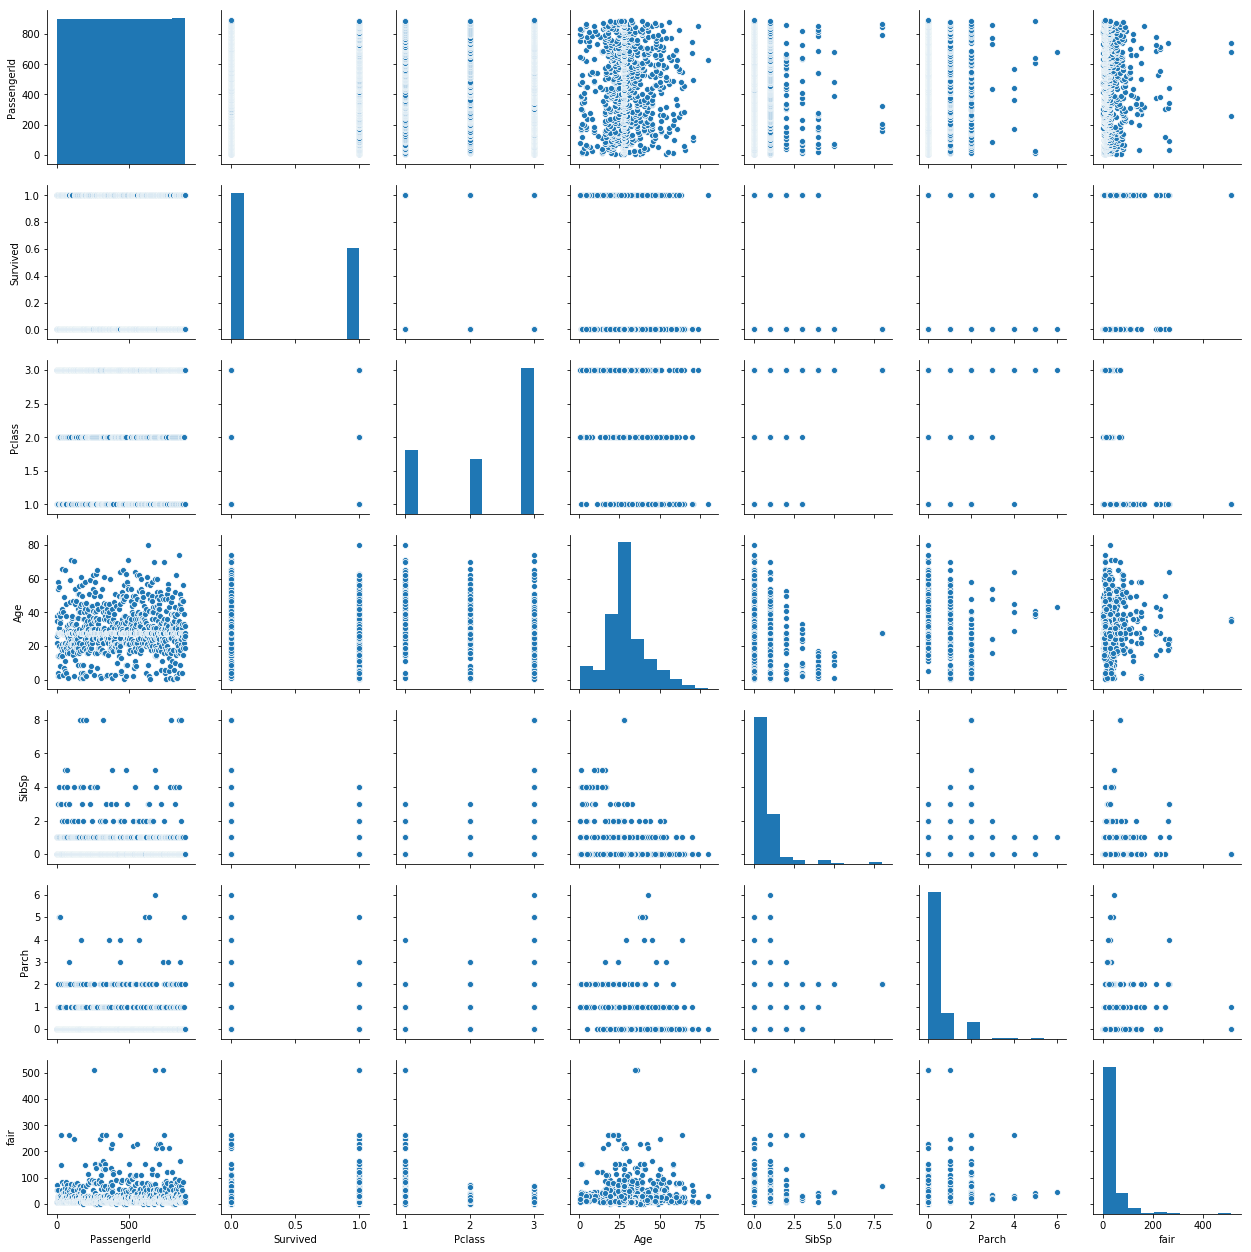

In [41]:
sns.pairplot(data)

In [42]:
data['Sex'].replace(['male', 'female'], [1, 0], inplace = True)

In [43]:
data['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3], inplace = True)

In [44]:
data['Embarked'].isnull().sum()

2

In [45]:
data['Embarked'].fillna(data['Embarked'].median(), inplace = True)

In [46]:
em = sorted(data['Embarked'].unique())
for i in em:
    print('Total', {i}, ':', len(data[(data['Embarked'] == i)]))
    print('Total dead', {i}, ':', len(data[(data['Embarked'] == i) & (data['Survived'] == 0)]))
    print('Total Survived', {i}, ':', len(data[(data['Embarked'] == i) & (data['Survived'] == 1)]))
    print('Total men in family', {i}, ':', len(data[(data['Sex'] == 1) & (data['Embarked'] == i)]))
    print('Total dead men in family', {i}, ':', len(data[(data['Sex'] == 1) & (data['Embarked'] == i) & (data['Survived'] == 0)]))
    print('Total survived men in family', {i}, ':', len(data[(data['Sex'] == 1) & (data['Embarked'] == i) & (data['Survived'] == 1)]))
    print('Total female in family', {i}, ':', len(data[(data['Sex'] == 0) & (data['Embarked'] == i)]))
    print('Total dead female in family', {i}, ':', len(data[(data['Sex'] == 0) & (data['Embarked'] == i) & (data['Survived'] == 0)]))
    print('Total survived female in family', {i}, ':', len(data[(data['Sex'] == 0) & (data['Embarked'] == i) & (data['Survived'] == 1)]))    

Total {1.0} : 168
Total dead {1.0} : 75
Total Survived {1.0} : 93
Total men in family {1.0} : 95
Total dead men in family {1.0} : 66
Total survived men in family {1.0} : 29
Total female in family {1.0} : 73
Total dead female in family {1.0} : 9
Total survived female in family {1.0} : 64
Total {2.0} : 77
Total dead {2.0} : 47
Total Survived {2.0} : 30
Total men in family {2.0} : 41
Total dead men in family {2.0} : 38
Total survived men in family {2.0} : 3
Total female in family {2.0} : 36
Total dead female in family {2.0} : 9
Total survived female in family {2.0} : 27
Total {3.0} : 646
Total dead {3.0} : 427
Total Survived {3.0} : 219
Total men in family {3.0} : 441
Total dead men in family {3.0} : 364
Total survived men in family {3.0} : 77
Total female in family {3.0} : 205
Total dead female in family {3.0} : 63
Total survived female in family {3.0} : 142


In [47]:
survived_age = data[data['Survived'] == 1]['Age']
notsurvived_age = data[data['Survived'] == 0]['Age']
max_age = max(data['Age'])

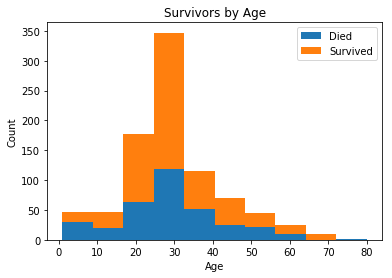

In [48]:
plt.hist([survived_age,notsurvived_age], range = (1, max_age), stacked = True)
plt.title('Survivors by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(('Died', 'Survived'), loc='best')
plt.show()

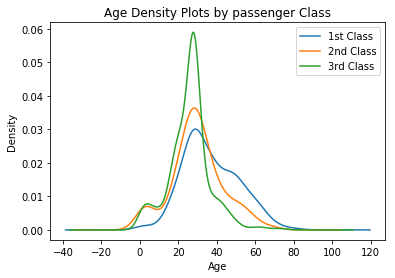

In [49]:
uniq = sorted(data['Pclass'].unique())
for i in uniq:
            data.Age[data.Pclass == i].plot(kind='density')
plt.title('Age Density Plots by passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

In [50]:
data['Family'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,fair,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,3.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3.0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,3.0,0


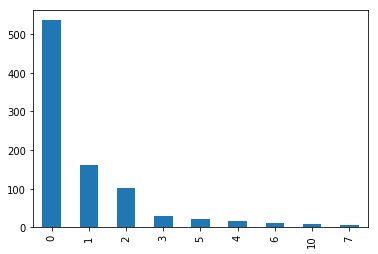

In [51]:
data['Family'].value_counts().plot(kind = 'bar', stacked = True)

In [52]:
fam = sorted(data["Family"].unique())
for i in fam:
    print('Total', {i}, ':', len(data[(data['Family'] == i)]))

Total {0} : 537
Total {1} : 161
Total {2} : 102
Total {3} : 29
Total {4} : 15
Total {5} : 22
Total {6} : 12
Total {7} : 6
Total {10} : 7


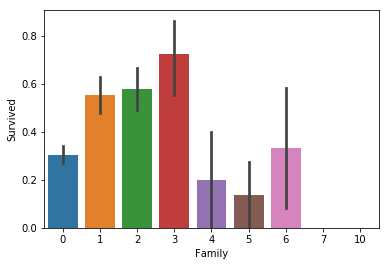

In [53]:
sns.barplot(x = 'Family', y = 'Survived', data = data)

In [54]:
for i in fam:
    print('Total', {i}, ':', len(data[(data['Family'] == i)]))
    print('Total dead', {i}, ':', len(data[(data['Family'] == i) & (data['Survived'] == 0)]))
    print('Total Survived', {i}, ':', len(data[(data['Family'] == i) & (data['Survived'] == 1)]))
    print('Total men in family', {i}, ':', len(data[(data['Sex'] == 1) & (data['Family'] == i)]))
    print('Total dead men in family', {i}, ':', len(data[(data['Sex'] == 1) & (data['Family'] == i) & (data['Survived'] == 0)]))
    print('Total survived men in family', {i}, ':', len(data[(data['Sex'] == 1) & (data['Family'] == i) & (data['Survived'] == 1)]))
    print('Total female in family', {i}, ':', len(data[(data['Sex'] == 0) & (data['Family'] == i)]))
    print('Total dead female in family', {i}, ':', len(data[(data['Sex'] == 0) & (data['Family'] == i) & (data['Survived'] == 0)]))
    print('Total survived female in family', {i}, ':', len(data[(data['Sex'] == 0) & (data['Family'] == i) & (data['Survived'] == 1)]))    

Total {0} : 537
Total dead {0} : 374
Total Survived {0} : 163
Total men in family {0} : 411
Total dead men in family {0} : 347
Total survived men in family {0} : 64
Total female in family {0} : 126
Total dead female in family {0} : 27
Total survived female in family {0} : 99
Total {1} : 161
Total dead {1} : 72
Total Survived {1} : 89
Total men in family {1} : 74
Total dead men in family {1} : 56
Total survived men in family {1} : 18
Total female in family {1} : 87
Total dead female in family {1} : 16
Total survived female in family {1} : 71
Total {2} : 102
Total dead {2} : 43
Total Survived {2} : 59
Total men in family {2} : 53
Total dead men in family {2} : 32
Total survived men in family {2} : 21
Total female in family {2} : 49
Total dead female in family {2} : 11
Total survived female in family {2} : 38
Total {3} : 29
Total dead {3} : 8
Total Survived {3} : 21
Total men in family {3} : 10
Total dead men in family {3} : 5
Total survived men in family {3} : 5
Total female in family {3

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [56]:
df = data.drop(['PassengerId', 'Name', 'SibSp', 'Parch'], axis = 1)

In [57]:
inp = df.iloc[:,1:]
target = df.iloc[:,0]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp,target,test_size=0.2, random_state=50)

In [59]:
print (inp.shape, target.shape)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(891, 6) (891,)
(712, 6) (712,)
(179, 6) (179,)


### LogisticRegression

In [60]:
log = LogisticRegression()
log.fit(X_train, y_train)
predict = log.predict(X_test)
accuracy = accuracy_score(y_test, predict)

print('Logistic Regression Accuracy is :',accuracy)

Logistic Regression Accuracy is : 0.7877094972067039


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### SVC

In [61]:
svc = SVC()
svc.fit(X_train, y_train)
predict = svc.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('SVC Accuracy is :',accuracy)

SVC Accuracy is : 0.6703910614525139


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random Forest

In [62]:
RandomForest = RandomForestClassifier(n_estimators=1000)
RandomForest.fit(X_train, y_train)
predict = RandomForest.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('Random Forest Accuracy is :',accuracy)

Random Forest Accuracy is : 0.7988826815642458


### Decision Tree

In [63]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('Decision_Tree Accuracy is :',accuracy)

Decision_Tree Accuracy is : 0.770949720670391


### LinearSVC

In [64]:
linear = LinearSVC()
linear.fit(X_train, y_train)
predict = linear.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('LinearSVC Accuracy is :',accuracy)

LinearSVC Accuracy is : 0.6871508379888268


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### KNN

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('KNN Accuracy is :',accuracy)

KNN Accuracy is : 0.6871508379888268


### GaussianNB

In [66]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
predict = gauss.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('GaussianNB Accuracy is :',accuracy)

GaussianNB Accuracy is : 0.8044692737430168


### SGDClassifier

In [67]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
predict = sgd.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('SGDClassifier Accuracy is :',accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier Accuracy is : 0.41899441340782123
